<a href="https://colab.research.google.com/github/Min-Thway-Htut/Machine-Learning/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [15]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
None
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000      

In [24]:
X = data.drop('median_house_value', axis=1)
y = data["median_house_value"]
# define features and target

In [25]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Data Exploration

print(data.isnull().sum().sum())
print(y_train.value_counts())

0
median_house_value
500001.0    103
225000.0     16
162500.0     14
137500.0     13
87500.0      12
           ... 
70200.0       1
376800.0      1
252700.0      1
335400.0      1
489800.0      1
Name: count, Length: 1545, dtype: int64


In [28]:
#Train Decision Tree Model

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Test the model
y_pred = clf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [32]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.0217
Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0 12]]


In [33]:
print(f'Max depth of the tree: {clf.max_depth}')
print(f'Feature importances: {clf.feature_importances_}')

Max depth of the tree: None
Feature importances: [0.11977663 0.11019034 0.12020352 0.11629712 0.12215985 0.13360154
 0.11793242 0.15983858]


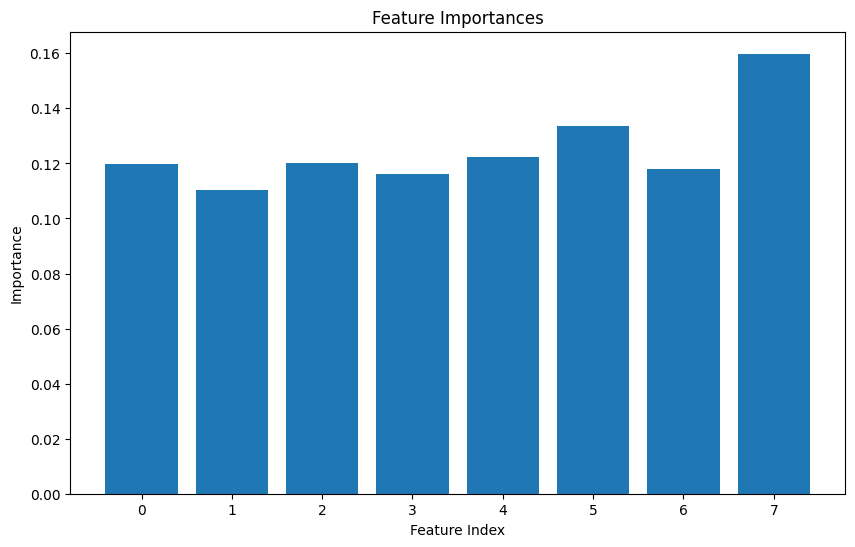

In [34]:
plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), clf.feature_importances_)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()